# CS 558 Homework 2 
## Joshua Meharg and Saoirse Mooney
I pledge my honor that I have abided by the Stevens Honor System

In [109]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [110]:
import numpy as np
import random as rand
import math
from tqdm import tqdm
import copy 
from PIL import Image as im
from IPython.display import Image
import cv2

[[244 244 245 ... 131 130 130]
 [242 243 243 ... 130 131 131]
 [241 241 241 ... 130 132 131]
 ...
 [ 67  69  69 ...  50  84  84]
 [ 68  69  67 ...  53  84  84]
 [ 67  72  69 ...  61  84  84]]


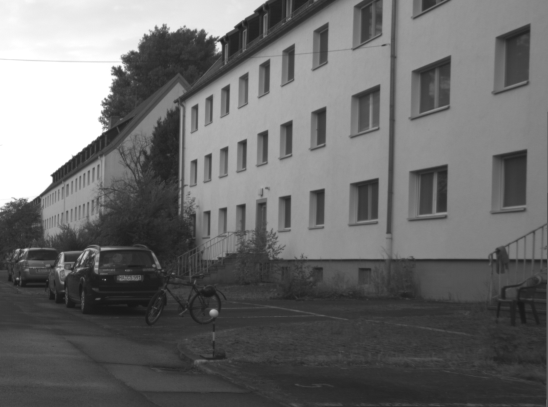

In [111]:
demo_img = im.open('road.png')
img_matrix = np.array(demo_img)

# record the original shape
shape = img_matrix.shape
print(img_matrix)
Image(filename='road.png') 

# **Problem 1**

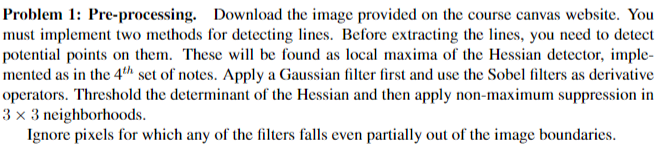

# For problem 1 we apply the gaussian filter to the given image and calculate the second moment matrix. We then take the dterminant of the second moment matrix and apply non-maximum suppression to it to output an image with the potential points specified as the brightest points.

In [112]:
def generateWindow(s):
    X = np.zeros([s,s], dtype=int)
    Y = np.zeros([s,s], dtype=int)
    rnge = math.floor(s/2)
    curr_r = -1*rnge
    for i in range(0,s):
        Y[i] = np.full(s, curr_r)        
        for j in range(0,s):
            X[j][i] = curr_r
        curr_r += 1 
    
    return X,Y

In [113]:
def generateGaussianFilter(sigma): 
    # generate windows
    X,Y = generateWindow(6*sigma-1)

    coef = 1 / (2 * math.pi * sigma**2)
    s = len(X)
    result = np.zeros([s, s])
    
    for i in range(0, s):
        for j in range(0, s):
            xi = X[i][j]
            yi = Y[i][j]
            power = -1 * (xi*xi + yi*yi) / (2*sigma*sigma)
            result[i][j] = coef * math.exp(power)
    
    filter_sum = np.sum(np.sum(result))
    print("The sum of the filter coefficients is ",filter_sum)
    if filter_sum < 0.95:
        print("WARNING: the filter coefficients do not sum to 1")
    return result

In [114]:
def applyGaussian(filtr, input_img):
    s = len(filtr)
    rows = len(input_img)-(2*math.floor(s/2))
    cols = len(input_img[0])-(2*math.floor(s/2))
    result = np.zeros([rows, cols])
    
    for x in tqdm(range(0, rows)):
        for y in range(0, cols):
            local_pixels = np.zeros([s, s])
            # fill temp matrix w elems from image
            for i in range(0, s):
                for j in range(0, s):
                    local_pixels[i][j] = input_img[x+i][y+j]
            # convolve filter and local pixels   
            result[x][y]=np.sum(np.sum(np.multiply(filtr,local_pixels)))
            #result[x][y] = np.sum(np.multiply(local_pixels.flatten(), np.flip(filtr.flatten())))
        
    return result             

In [115]:
horizontal_sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
horizontal_sobel_filter


array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [116]:
vertical_sobel_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
vertical_sobel_filter

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

# In the above two cells we declare the horizontal and vertical sobel filters that will be used to calculate the second moment matrix

In [117]:
def convolve(filtr, img):
    image_rows = len(img)
    image_columns = len(img[0])
    # create a copy of image for padding
    s = len(filtr)
    print("img size",np.shape(img))

    result = np.zeros([image_rows, image_columns])
    
    for x in tqdm(range(0,image_rows-2)):
        for y in range(0,image_columns-2):
            local_pixels = np.zeros([s, s])
            # fill temp matrix w elems from image
            for i in range(0, s):
                for j in range(0, s):
                    local_pixels[i][j] = img[x+i][y+j]
            result[x][y]=np.sum(np.sum(np.multiply(filtr,local_pixels)))
            #result[x][y]=np.sum(np.multiply(local_pixels.flatten(), np.flip(filtr.flatten())))
                        
    return result

In [118]:
def gradient_computation(Gx, Gy):
    rows = len(Gx)
    columns = len(Gx[0])
    result = np.zeros([rows, columns])
    
    for i in range(0, rows):
        for j in range(0, columns):
            gx = Gx[i][j]
            gy = Gy[i][j]
            G = math.sqrt((gx**2) + (gy**2))
            result[i][j] = G
    return result
    

In [119]:
gaussian_filtr = generateGaussianFilter(1)
gauss_img_matrix = applyGaussian(gaussian_filtr, img_matrix)

The sum of the filter coefficients is  0.9818147610543744


100%|██████████| 403/403 [00:05<00:00, 74.83it/s]


# First we apply the Gaussian filter onto the Image

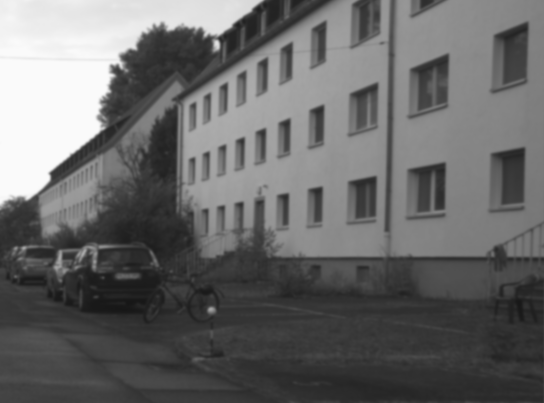

In [120]:
im.fromarray(gauss_img_matrix.astype(np.uint8))

In [121]:
# gaussian already applied to input img
XX = convolve(horizontal_sobel_filter, (convolve(horizontal_sobel_filter, gauss_img_matrix))) #caluclate Ixx
XY = convolve(vertical_sobel_filter, (convolve(horizontal_sobel_filter, gauss_img_matrix))) #calculate Ixy
YY = convolve(vertical_sobel_filter, (convolve(vertical_sobel_filter, gauss_img_matrix))) #calculate Iyy

img size (403, 544)


100%|██████████| 401/401 [00:03<00:00, 112.44it/s]


img size (403, 544)


100%|██████████| 401/401 [00:03<00:00, 111.92it/s]


img size (403, 544)


100%|██████████| 401/401 [00:03<00:00, 113.06it/s]


img size (403, 544)


100%|██████████| 401/401 [00:03<00:00, 111.80it/s]


img size (403, 544)


100%|██████████| 401/401 [00:04<00:00, 93.96it/s] 


img size (403, 544)


100%|██████████| 401/401 [00:03<00:00, 110.48it/s]


# We then covolve the image with horizontal and vertical sobel filters twice to calculate the second moment matrix. We store each element of the second moment matrix into XX, XY, and YY.

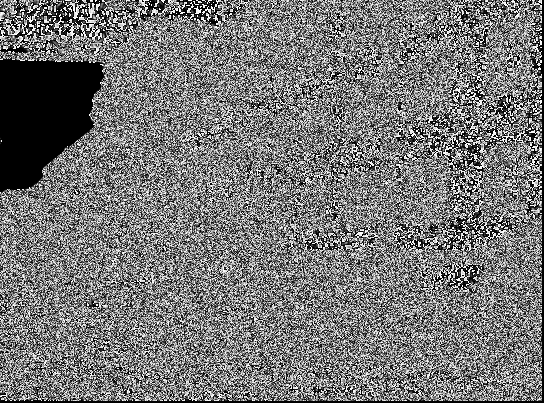

In [122]:
det_xx_yy =np.multiply(XX, YY)
im.fromarray(det_xx_yy.astype(np.uint8))

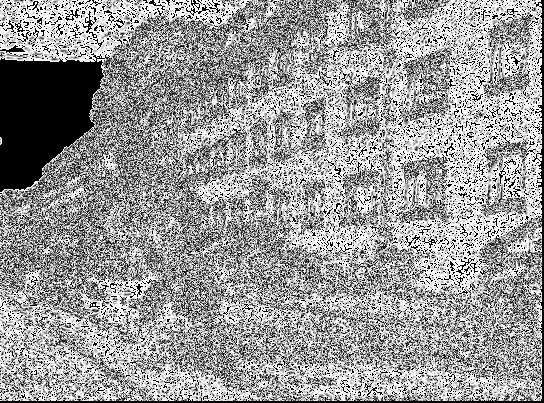

In [123]:
det_xy_xy =  np.multiply(-1,np.multiply(XY,XY))
im.fromarray(det_xy_xy.astype(np.uint8))

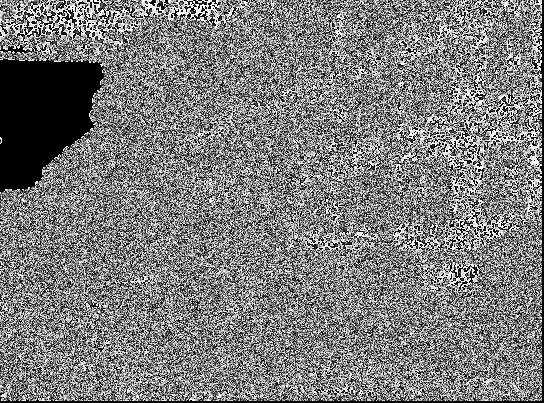

In [124]:
res_img = np.sum([det_xx_yy, det_xy_xy], axis=0)
im.fromarray(res_img.astype(np.uint8))

# We then calcualte the determinate of the second moment matrix using the forumla:
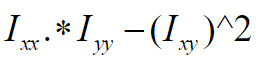

# Which is calculated in python with commands below:

##  det_xx_yy =np.multiply(XX, YY)
##  det_xy_xy =  np.multiply(-1,np.multiply(XY,XY))
##  res_img = np.sum([det_xx_yy, det_xy_xy], axis=0)


In [125]:
def letlight(imgin):
  #makes all promienant points 255 all non 0
  #used after non-max suppression to threshold
  max = 0.15*imgin.max()
  img = copy.copy(imgin)
  row = len(img)
  col = len(img[0])
  for i in range(0, row):
    for j in range(0, col):
      if (img[i][j] > max):
        img[i][j] = 255
      else:
        img[i][j] = 0
  
  return img

In [126]:
def non_max_sup(imgin):
  img = copy.copy(imgin)
  row = len(img)
  col = len(img[0])
    
  
  for i in tqdm(range(0, row)):
    #print("i = " + str(i))
    for j in range(0, col):
      #on upper left edge
      if (i == 0 and j==0):
        if (img[i][j] < img[i][j+1]
            or img[i][j] < img[i+1][j]
            or img[i][j] < img[i+1][j+1]):
              img[i][j] = 0
      
      #on bottom left
      elif (i == len(img)-1 and j==0):
        if (img[i][j] < img[i][j+1]
            or img[i][j] < img[i-1][j]
            or img[i][j] < img[i-1][j+1]):
              img[i][j] = 0
      
      #on top right
      elif (i == 0 and j==len(img[0])-1):
        if (img[i][j] < img[i][j-1]
            or img[i][j] < img[i+1][j]
            or img[i][j] < img[i+1][j-1]):
              img[i][j] = 0

      #on bottom right
      elif (i== len(img)-1 and j == len(img[0])-1):
        if (img[i][j] < img[i][j-1]
            or img[i][j] < img[i-1][j]
            or img[i][j] < img[i-1][j-1]):
              img[i][j] = 0

      #on left edge
      elif (j == 0):
        if (img[i][j] < img[i-1][j] 
            or img[i][j] < img[i-1][j+1]
            or img[i][j] < img[i][j+1]
            or img[i][j] < img[i+1][j+1]
            or img[i][j] < img[i+1][j]):
            #dont keep current point
              img[i][j] = 0
      
      #on right edge
      elif (j == len(img[0])-1):
        if (img[i][j] < img[i-1][j] #above
            or img[i][j] < img[i-1][j-1] #top left
            or img[i][j] < img[i][j-1] #left
            or img[i][j] < img[i+1][j-1] #bottom left
            or img[i][j] < img[i+1][j]):
            #dont keep current point
              img[i][j] = 0
            
      #on top edge
      elif (i == 0):
        if (img[i][j] < img[i][j-1] #left
            or img[i][j] < img[i+1][j-1] #bottom left
            or img[i][j] < img[i+1][j] #below
            or img[i][j] < img[i+1][j+1] #bottom right
            or img[i][j] < img[i][j+1]):
            #dont keep current point
              img[i][j] = 0
            
      #on bottom edge
      elif (i == len(img)-1):
        if (img[i][j] < img[i][j-1] #left
            or img[i][j] < img[i-1][j-1] #top left
            or img[i][j] < img[i-1][j] #above
            or img[i][j] < img[i-1][j+1] #top right
            or img[i][j] < img[i][j+1]):
            #dont keep current point
              img[i][j] = 0

      # middle case
      elif (img[i][j] < img[i-1][j-1] 
          or img[i][j] < img[i][j-1] 
          or img[i][j] < img[i+1][j-1]
          or img[i][j] < img[i+1][j]
          or img[i][j] < img[i+1][j+1]
          or img[i][j] < img[i][j+1]
          or img[i][j] < img[i-1][j+1]
          or img[i][j] < img[i-1][j]):
          #dont keep current point
            img[i][j] = 0
      
      
        
  return img

In [127]:

test = non_max_sup(res_img)
#im.fromarray(test.astype(np.uint8))

100%|██████████| 403/403 [00:00<00:00, 821.14it/s]


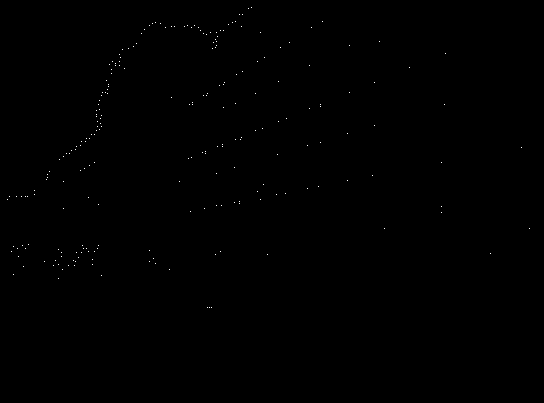

In [128]:
test1 = letlight(test)
test1_array = im.fromarray(test1.astype(np.uint8))
test1_array.save('hessian.png')
Image('hessian.png')

# We then apply non-max suppression to the image and call the letlight() function to set points either to 0 or 255 based on a threshold

# **Problem 2**

# We have implemented RANSAC to take in an image, a distance threshold to determine how close points have to be to the line to be considered inliers and a target amount of inliers for the model to be accepted. RANSAC will then run till it finds 4 models with at least target number of inliers in its model. With each model chosen it removes the inliers from the imag before the next iteration of RANSAC is run so as not to reuse inliers.

In [129]:
def lineLow(x0, y0, x1, y1, img, t):
  # draws best estamtion of line in matrix
  # create black image using shape of input image
  #print("using points\n (" + str(y0) + "," + str(x0) + ")\n (" + str(y1) + "," + str(x1) + ")\n")
  
  p1x = y0
  p1y = x0
  p2x = y1
  p2y = x1

  rows = len(img)
  cols = len(img[0])
  result = copy.copy(img)
  inliers = 0

  dx = x1 - x0
  dy = y1 - y0
  yi = 1
  if (dy < 0):
      yi = -1
      dy = -dy
  D = (2 * dy) - dx
  y = y0

  for x in range(0, len(img)):
      if (abs(y) >= len(img[0]) or y < 0):
        return result, inliers, p1x, p1y, p2x, p2y
      result[x][y] = 255
      for i in range(0, len(img[0])):
        if (img[x][i] == 255):
          if (abs(y - i) <= t):
            result[x][i] = 240
            # img[x][i] = 0 #remove inliers from this example from original img
            inliers += 1


      if (D > 0):
          y = y + yi
          D = D + (2 * (dy - dx))
      else:
          D = D + 2*dy

  return result, inliers, p1x, p1y, p2x, p2y

In [130]:
def lineHigh(x0, y0, x1, y1, img, t):
  # draws best estamtion of line in matrix
  # create black image using shape of input image
  #print("using points\n (" + str(y0) + "," + str(x0) + ")\n (" + str(y1) + "," + str(x1) + ")\n")
  p1x = y0
  p1y = x0
  p2x = y1
  p2y = x1

  rows = len(img)
  cols = len(img[0])
  result = copy.copy(img)
  inliers = 0
  
  dx = x1 - x0
  dy = y1 - y0
  xi = 1
  if (dx < 0):
      xi = -1
      dx = -dx
  
  D = (2 * dx) - dy
  x = x0

  for y in range(0, len(img[0])):
      if (x >= len(img) or x < 0):
        return result, inliers, p1x, p1y, p2x, p2y
      result[x][y] = 255
      for i in range(0, len(img)):
        if (img[i][y] == 255):
          if (abs(x - i) <= t):
            result[i][y] = 240
            #img[i][y] = 0 #remove inliers from this example from original img
            inliers += 1


      if (D > 0):
          x = x + xi
          D = D + (2 * (dx - dy))
      else:
          D = D + 2*dx
  return result, inliers, p1x, p1y, p2x, p2y

 
    

In [131]:
def plotLine(x0, y0, x1, y1, img, t):
    # t is the threshold for how far a point can be from line
    # to be considered an inlier
    # c is the threshold for how bright the point has to be to be
    # considered an inlier
    
    #print("using points\n (" + str(y0) + "," + str(x0) + ")\n (" + str(y1) + "," + str(x1) + ")\n")
    if (abs(y1 - y0) < abs(x1 - x0)):
        if (x0 > x1):
            #print("using lineLow")
            return lineLow(x1, y1, x0, y0, img, t)
        else:
            #print("using lineLow")
            return lineLow(x0, y0, x1, y1, img, t)
    else:
        if (y0 > y1):
            #print("using lineHigh")
            return lineHigh(x1, y1, x0, y0, img, t)
        else:
            #print("using lineHigh")
            return lineHigh(x0, y0, x1, y1, img, t)

In [132]:
def ransac(x0, y0, x1, y1, img, t):
  # t is the threshold for how far a point can be from line
  # to be considered an inlier
  # c is the threshold for how bright the point has to be to be
  # considered an inlier
  

  return plotLine(y0, x0, y1, x1, img, t)


# These methods above allow us to draw a line and calculate inliers to it. It does this by randomly selecting two points, drawing a line through them, and calculating how far each points is from the line int he image.

In [133]:
def removedinliers(img, result):
  #removes inliers that are marked by values of 240 when a model is accepted
  rows = len(img)
  cols = len(img[0])

  for i in range(0, rows):
    for j in range(0, cols):
      if (img[i][j] == 240):
        #print("deleted 1")
        result[i][j] = 0
  
  return result

# This method above removes inliers from the image which is used to ensure inliers are not reused from one accepted model to the other

In [134]:
def emphasize_inliers(img, target):
  row = len(img)
  col = len(img[0])
    
  
  for i in range(0, row):
    #print("i = " + str(i))
    for j in range(0, col):
      #on upper left edge
      if (i == 0 and j==0 and img[i][j] == target):
        img[i][j+1] = 255
        img[i+1][j] = 255
        img[i+1][j+1] = 255
      
      #on bottom left
      elif (i == len(img)-1 and j==0 and img[i][j] == target):
        img[i][j+1] = 255
        img[i-1][j] = 255
        img[i-1][j+1] = 255
      
      #on top right
      elif (i == 0 and j==len(img[0])-1 and img[i][j] == target):
        img[i][j-1] = 255
        img[i+1][j] = 255
        img[i+1][j-1] = 255
              
      #on bottom right
      elif (i== len(img)-1 and j == len(img[0])-1 and img[i][j] == target):
        img[i][j-1] = 255
        img[i-1][j] = 255
        img[i-1][j-1] = 255

      #on left edge
      elif (j == 0 and img[i][j] == target):
        img[i-1][j] = 255
        img[i-1][j+1] = 255
        img[i][j+1] = 255
        img[i+1][j+1] = 255
        img[i+1][j] = 255
      
      #on right edge
      elif (j == len(img[0])-1 and img[i][j] == target):
        img[i-1][j] = 255 #above
        img[i-1][j-1] = 255 #top left
        img[i][j-1] = 255 #left
        img[i+1][j-1] = 255 #bottom left
        img[i+1][j] = 255
            
      #on top edge
      elif (i == 0 and img[i][j] == target):
        img[i][j-1] = 255 #left
        img[i+1][j-1] = 255 #bottom left
        img[i+1][j] = 255 #below
        img[i+1][j+1] = 255 #bottom right
        img[i][j+1] = 255
        
            
      #on bottom edge
      elif (i == len(img)-1 and img[i][j] == target):
        img[i][j-1] = 255 #left
        img[i-1][j-1] = 255 #top left
        img[i-1][j] = 255 #above
        img[i-1][j+1] = 255 #top right
        img[i][j+1] = 255

      # middle case
      elif (img[i][j] == target):
        img[i-1][j-1] = 255
        img[i][j-1] = 255 
        img[i+1][j-1] = 255
        img[i+1][j] = 255
        img[i+1][j+1] = 255
        img[i][j+1] = 255
        img[i-1][j+1] = 255
        img[i-1][j] = 255
      
      
        
  return img

# The method above plots the inliers in 3x3 areas to allow them to be more visible in the output image

In [135]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def runransac(imgin, t, target):
  # runs iterations of ransac till it finds 4 models that have at least target inliers
  # t is the threshold for how far a point can be from line
  # to be considered an inlier
  # target is the amount of inliers needed to accept the model
  img = copy.copy(imgin)

  x0 = rand.randint(0, len(img)-1) 
  y0 = rand.randint(0, len(img[0])-1) 

  x1 = rand.randint(0, len(img)-1) 
  y1 = rand.randint(0, len(img[0])-1)
  # x0, y0, x1, y1, img0, img1, img2, img3, best1x0, best2x0, best3x0, best1y0, best2y0, best3y0, best1x1, best2x1, best3x1, best1y1, best2y1, best3y1 

  img0, num0, best0x0, best0y0, best0x1, best0y1 = ransac(x0, y0, x1, y1, img, t)
  img1 = img0
  img2= img0
  img3 = img0
  num1 = num0
  num2 = num0
  num3 = num0
  best1x0 = best0x0
  best2x0 = best0x0
  best3x0 = best0x0
  best1y0 = best0y0
  best2y0 = best0y0
  best3y0 = best0y0
  best1x1 = best0x1
  best2x1 = best0x1
  best3x1 = best0x1
  best1y1 = best0y1
  best2y1 = best0y1
  best3y1 = best0y1

  num0 = 0
  num1 = 0
  num2 = 0
  num3 = 0

  found0 = False
  found1 = False
  found2 = False
  found3 = False

  while((not found0) or (not found1) or (not found2) or (not found3)):
    x0 = rand.randint(0, len(img)-1) 
    y0 = rand.randint(0, len(img[0])-1) 

    x1 = rand.randint(0, len(img)-1) 
    y1 = rand.randint(0, len(img[0])-1)
    
    img4, num4, best4x0, best4y0, best4x1, best4y1 = ransac(x0, y0, x1, y1, img, t)
    if (num4 >= target and (not found0)):
      img0 = img4
      num0 = num4
      best0x0 = best4x0
      best0y0 = best4y0
      best0x1 = best4x1
      best0y1 = best4y1
      print("Found model with " + str(num0) + " inliers")
      found0 = True
      #remove inliers from chosen model to disallow other models from reusing inliers
      removedinliers(img0, img)
      emphasize_inliers(img0, 240)

    elif (num4 >= target and (not found1)):
      img1 = img4
      num1 = num4
      best1x0 = best4x0
      best1y0 = best4y0
      best1x1 = best4x1
      best1y1 = best4y1
      print("Found model with " + str(num1) + " inliers")
      found1 = True
      #remove inliers from chosen model to disallow other models from reusing inliers
      removedinliers(img1, img)
      emphasize_inliers(img1, 240)
  
    elif (num4 >= target and (not found2)):
      img2 = img4
      num2 = num4
      best2x0 = best4x0
      best2y0 = best4y0
      best2x1 = best4x1
      best2y1 = best4y1
      print("Found model with " + str(num2) + " inliers")
      found2 = True
      #remove inliers from chosen model to disallow other models from reusing inliers
      removedinliers(img2, img)
      emphasize_inliers(img2, 240)

    elif (num4 >= target and (not found3)):
      img3 = img4
      num3 = num4
      best3x0 = best4x0
      best3y0 = best4y0
      best3x1 = best4x1
      best3y1 = best4y1
      print("Found model with " + str(num3) + " inliers")
      found3 = True
      #remove inliers from chosen model to disallow other models from reusing inliers
      removedinliers(img3, img)
      emphasize_inliers(img3, 240)

  print("\nModel 1\n (" + str(best0x0) + "," + str(best0y0) + ")\n (" + str(best0x1) + "," + str(best0y1) + ")\n amount of inliers within t and c constraits " + str(num0))
  print("\n")
  data0 = im.fromarray(img0.astype(np.uint8))
  data0.save('ransac0.png')
  Image(filename = 'ransac0.png')

  print("Model 2\n (" + str(best1x0) + "," + str(best1y0) + ")\n (" + str(best1x1) + "," + str(best1y1) + ")\n amount of inliers within t and c constraits " + str(num1))
  print("\n")
  data1 = im.fromarray(img1.astype(np.uint8))
  data1.save('ransac1.png')
  Image(filename = 'ransac1.png')

  print("Model 3\n (" + str(best2x0) + "," + str(best2y0) + ")\n (" + str(best2x1) + "," + str(best2y1) + ")\n amount of inliers within t and c constraits " + str(num2))
  print("\n")
  data2 = im.fromarray(img2.astype(np.uint8))
  data2.save('ransac2.png')
  Image(filename = 'ransac2.png')

  print("Model 4\n (" + str(best3x0) + "," + str(best3y0) + ")\n (" + str(best3x1) + "," + str(best3y1) + ")\n amount of inliers within t and c constraits " + str(num3))
  print("\n")
  data3 = im.fromarray(img3.astype(np.uint8))
  data3.save('ransac3.png')
  Image(filename = 'ransac3.png')
  




Found model with 36 inliers
Found model with 31 inliers
Found model with 37 inliers
Found model with 38 inliers

Model 1
 (49,134)
 (189,419)
 amount of inliers within t and c constraits 36


Model 2
 (139,79)
 (133,88)
 amount of inliers within t and c constraits 31


Model 3
 (81,179)
 (87,382)
 amount of inliers within t and c constraits 37


Model 4
 (39,267)
 (205,168)
 amount of inliers within t and c constraits 38



model 1 



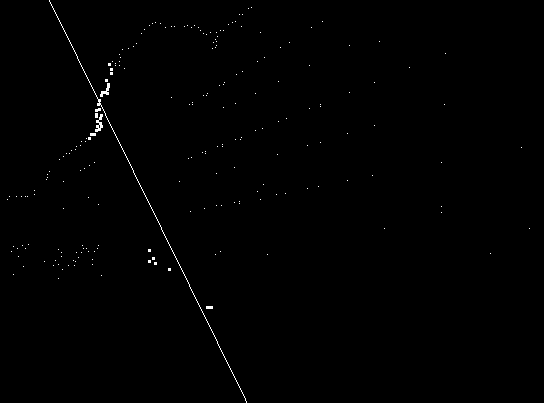


model 2 



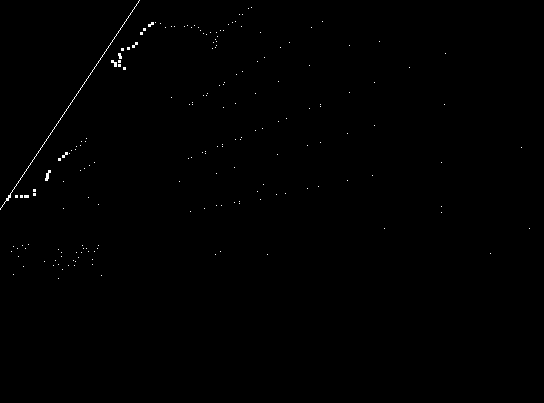


model 3 



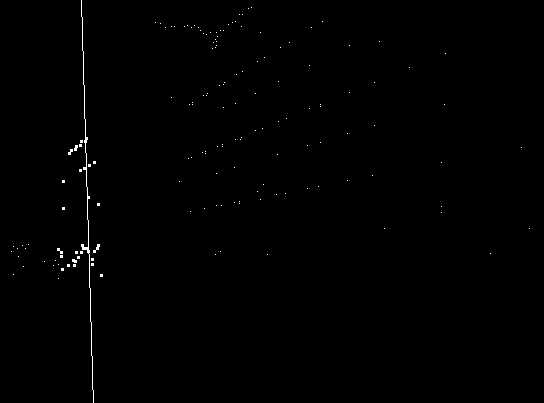


model 4 



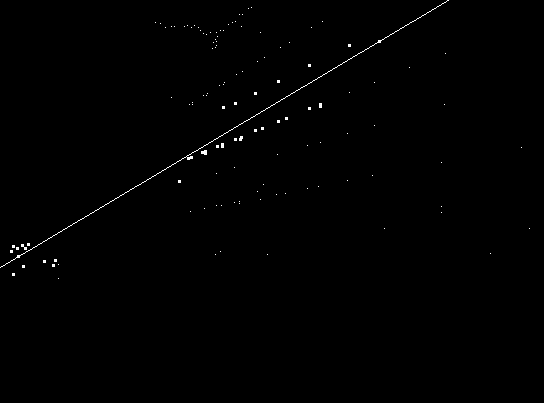

In [136]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

runransac(test1, 30, 30)

print("\nmodel 1 \n")
Image(filename = 'ransac0.png')

print("\nmodel 2 \n")
Image(filename = 'ransac1.png')

print("\nmodel 3 \n")
Image(filename = 'ransac2.png')

print("\nmodel 4 \n")
Image(filename = 'ransac3.png')



# Main driver method for RANSAC. Returns 4 models with inliers defined as points at most 't' distance away with each accepted model having at least 'target' inliers 


# As you can see with each sequential model points dissappear. This is showing that inliers chosen by one model are removed so as not to be reused by another model

# **Problem 3**

# This funcatino takes in two parameters, which correspond to the dimensions of the bin accumulator. It adjusts them to allow for even steps over 180 degrees for theta and 2*diagonal of the image for rho. It tallies up the votes for each edge point, and then a line is drawn for points that have a vote count higher than the set threshold.

In [137]:
def hough_transformation(theta_cols, rho_rows, in_img): #main parameters are the dimensions of the bins of the accumulator
    #thinking hspace is smaller than or equal to image -- what to do if bigger?
    x = len(in_img[0])
    y = len(in_img)
    # diagonal of input image
    diag = math.floor((x**2 + y**2)**.5 )
    # scale theta_rows and rho_cols -- problem - can be floats, need ints
    theta_step = 180 / theta_cols
    rho_step = 2*diag / rho_rows
    thetas = np.arange(0, 180, step=theta_step)
    rhos = np.arange(-diag, diag, step=rho_step)
    # Initialize accumulator H to all zeros
    hough_space = np.zeros([len(rhos), len(thetas)])
    # For each feature image point (x,y)
    for yi in tqdm(range(0, y)):
        for xi in range(0, x):
          if in_img[yi][xi] != 0:
            for t in range(0, len(thetas)):
                t_deg = thetas[t]
                t_rad = math.pi*t_deg/ 180
                p = math.floor(xi*math.cos(t_rad) + yi*math.sin(t_rad))
                rho_idx = np.argmin(np.abs(rhos - p))
                hough_space[rho_idx][t] += 10
    res_space = copy.copy(hough_space) 
    for r in range(0, len(rhos)):
      for t in range(0, len(thetas)): # Find the value(s) of (θ, ρ) where H(θ, ρ) is a local maximum – The detected line in the image is given by ρ = x cos θ + y sin θ
        if hough_space[r][t] > 500:
          rho = rhos[r]
          t_deg = thetas[t]
          t_rad = math.pi*t_deg/ 180
          xi = math.cos(t_rad)
          yi = math.sin(t_rad)
          x0 = (xi * rho) + x/2
          y0 = (t_rad * rho) + y/2
          x1 = int(x0 + 1000 * (-xi))
          y1 = int(y0 + 1000 * (yi))
          x2 = int(x0 - 1000 * (-yi))
          y2 = int(y0 - 1000 * (xi))
          res_space = cv2.line(res_space, [x1,y1], [x2,y2], (255, 255, 255), 1) 
                  
    return res_space
    

In [138]:
r_sp = hough_transformation(400,400, test1)

100%|██████████| 403/403 [00:00<00:00, 623.16it/s]


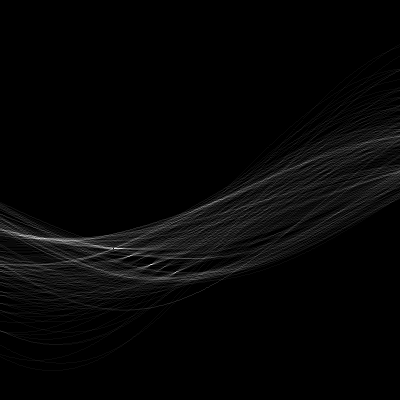

In [139]:
hough_space = im.fromarray(r_sp.astype(np.uint8))
hough_space.save('hough_space.png')
Image('hough_space.png')